# Data 불러오기 & import

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('sampled_data.csv',encoding ='cp949')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136330,2.108286,-0.020359,-2.234273,-0.124080,0.559843,-1.315913,0.631887,-0.385490,0.150628,...,0.162940,0.519705,-0.091751,-0.379542,0.418822,0.248646,-0.098857,-0.094773,7.70,0
1,116819,2.080143,-0.075408,-1.359381,0.261263,0.232201,-0.797886,0.233487,-0.330165,0.493154,...,-0.317765,-0.784150,0.233078,-0.636937,-0.191137,0.234986,-0.070648,-0.062794,17.99,0
2,27917,1.152650,0.204938,0.441832,1.211595,-0.254895,-0.383380,-0.004286,-0.019590,0.085094,...,0.066674,0.209828,-0.054351,0.058103,0.515330,-0.299402,0.032551,0.022865,21.00,0
3,97443,-0.389692,0.410148,0.616187,-0.686644,1.040312,-0.322199,0.523625,-0.037453,1.319237,...,0.116692,0.685267,-0.182303,0.767857,-0.242738,0.009678,0.115370,0.176041,6.60,0
4,17920,-1.306986,0.183306,3.164803,0.810135,1.529576,2.388322,0.551279,-0.054401,1.675481,...,-0.203993,0.556523,0.146513,-1.128693,-0.633623,-0.454903,-0.826329,-0.826186,4.95,0


In [4]:
df['Class'].value_counts() # 각걱 class에 몇개의 data가 있는지 확인

0    28428
1       52
Name: Class, dtype: int64

In [5]:
scaler = StandardScaler() # Scaling
df_new = df.drop(columns="Class")
scaler.fit_transform(df_new)
df_new = pd.DataFrame(scaler.fit_transform(df_new), columns = df_new.columns)

In [6]:
target = pd.Series(df.Class, dtype = "category")
df_new['class'] = target # class 0: malignant, class 1: benign
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.875992,1.102273,-0.013837,-1.519427,-0.092494,0.415984,-0.996862,0.529260,-0.325542,0.140034,...,0.217877,0.717147,-0.171055,-0.622575,0.811479,0.520065,-0.244661,-0.298899,-0.341627,0
1,0.465992,1.087628,-0.047477,-0.930583,0.178984,0.173824,-0.604853,0.194623,-0.278678,0.453561,...,-0.431114,-1.088996,0.399380,-1.044356,-0.370659,0.491879,-0.173318,-0.193811,-0.297983,0
2,-1.402175,0.604964,0.123842,0.281721,0.848501,-0.186188,-0.291182,-0.005096,-0.015599,0.080048,...,0.087910,0.287896,-0.105378,0.094572,0.998518,-0.610760,0.087681,0.087681,-0.285216,0
3,0.058829,-0.197667,0.249246,0.399070,-0.488826,0.771099,-0.244885,0.438324,-0.030730,1.209704,...,0.155438,0.946489,-0.330075,1.257612,-0.470666,0.026986,0.297138,0.591042,-0.346292,0
4,-1.612250,-0.675024,0.110623,2.114412,0.565669,1.132714,1.806258,0.461553,-0.045086,1.535788,...,-0.277512,0.768150,0.247363,-1.850173,-1.228224,-0.931617,-2.084501,-2.702442,-0.353291,0


# Logistic Regression 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], random_state = 0)
# train, test set 나누기

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape #train, test set 확인

((21360, 30), (7120, 30), (21360,), (7120,))

In [9]:
classifier = LogisticRegression() #classifier는 logistic Reg
classifier.fit(X_train, y_train) #fit method로 학습

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred = classifier.predict(X_test) # class 예측
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
classifier.predict_proba(X_test) # The returned estimates for all classes are ordered by the label of classes.

array([[9.99209106e-01, 7.90894246e-04],
       [9.99738708e-01, 2.61292060e-04],
       [9.99998580e-01, 1.42049928e-06],
       ...,
       [9.96341932e-01, 3.65806843e-03],
       [9.99395800e-01, 6.04199595e-04],
       [9.99578107e-01, 4.21893358e-04]])

### mean accuracy 

정확도(accuracy)는 전체 샘플 중 맞게 예측한 샘플 수의 비율을 뜻한다. 높을수록 좋은 모형이다. 일반적으로 학습에서 최적화 목적함수로 사용된다.
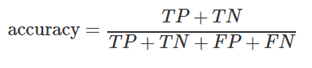

In [12]:
classifier.score(X_test, y_test)#mean accuracy

0.998876404494382

### confusion matrix

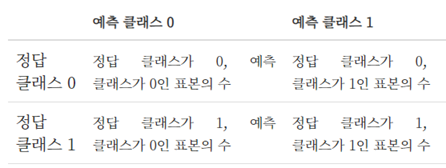

분류결과표(Confusion Matrix)는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과를 표나 나타낸 것이다. 정답 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다.

In [13]:
from sklearn.metrics import *

In [14]:
confusion_matrix(y_test, y_pred)

array([[7108,    3],
       [   5,    4]], dtype=int64)

confusion matrix로 accuracy 계산하기
accuracy = (7108+4)/(7108+3+5+4) = 0.9988764045

### score

##### precision
정밀도(precision)은 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율을 말한다. 높을수록 좋은 모형이다. FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율이 된다.
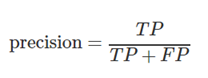



##### recall (=sensitivity)
재현율(recall)은 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율을 뜻한다. 높을수록 좋은 모형이다. FDS의 경우 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율이 된다. TPR(true positive rate) 또는 민감도(sensitivity)라고도 한다.
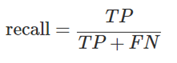


##### fall out
위양성율(fall-out)은 실제 양성 클래스에 속하지 않는 표본 중에 양성 클래스에 속한다고 출력한 표본의 비율을 말한다. 다른 평가점수와 달리 낮을수록 좋은 모형이다. FDS의 경우에는 실제로는 정상 거래인데 FDS가 사기 거래라고 예측한 거래의 비율이 된다. FPR(false positive rate)또는 1에서 위양성률의 값을 뺀 값을 특이도(specificity)라고도 한다.
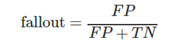

In [15]:
precision = 7108 / (7108 + 5)
recall = 7108 / (7108 + 3)
fallout = 5 / (5 + 4)
print("precision =", precision)
print("recall =", recall)
print("fallout =", fallout)

precision = 0.9992970617179812
recall = 0.9995781184081002
fallout = 0.5555555555555556


##### f1 score
정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다. 정밀도에 주어지는 가중치를 베타(beta)라고 한다.

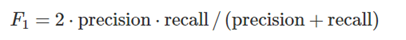
 
베타가 1인 경우를 특별히 F1점수라고 한다.

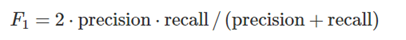

In [16]:
f1_score(y_test, y_pred) # f1 score

0.5

In [17]:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      7111
     class 1       0.57      0.44      0.50         9

    accuracy                           1.00      7120
   macro avg       0.79      0.72      0.75      7120
weighted avg       1.00      1.00      1.00      7120



# ROC curve

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
# 순서대로 fpr, tpr, thresholds를 리턴함!
# fpr = 1-specificity
# tpr = sensitivity
# thresholds = 해당 fpr, tpr을 리턴할 때의 thesholds(cut-off) 값!
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.40627197e-04,
        1.40627197e-04, 4.21881592e-04, 4.21881592e-04, 7.03135986e-04,
        7.03135986e-04, 1.54689917e-03, 1.54689917e-03, 2.95317114e-03,
        2.95317114e-03, 8.85951343e-03, 8.85951343e-03, 2.77035579e-02,
        2.77035579e-02, 3.54802419e-01, 3.55083673e-01, 1.00000000e+00]),
 array([0.        , 0.11111111, 0.22222222, 0.22222222, 0.33333333,
        0.33333333, 0.44444444, 0.44444444, 0.55555556, 0.55555556,
        0.66666667, 0.66666667, 0.77777778, 0.77777778, 0.88888889,
        0.88888889, 1.        , 1.        , 1.        , 1.        ]),
 array([1.99999996e+00, 9.99999963e-01, 9.99974303e-01, 9.98710106e-01,
        9.61486138e-01, 6.37759039e-01, 5.48064850e-01, 3.67719455e-01,
        3.61161720e-01, 1.36474313e-01, 1.33988558e-01, 8.67476930e-02,
        7.93860346e-02, 3.25721684e-02, 3.22297013e-02, 1.35002554e-02,
        1.33770370e-02, 5.96636188e-04, 5.96320953e-04, 5.44779805e-12]))

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

ROC(Receiver Operator Characteristic) 커브는 클래스 판별 기준값의 변화에 따른 위양성률(fall-out)과 재현율(recall)의 변화를 시각화한 것이다.

Text(0, 0.5, 'Sensitivity')

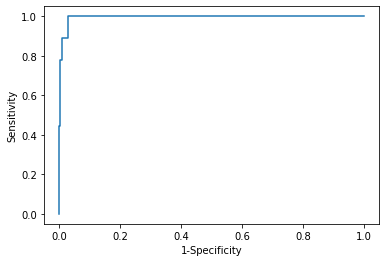

In [27]:
x = fpr #recall
y = tpr #fall out

plt.plot(x,y) # 간단하게 ROC 그려볼 수 있음.
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

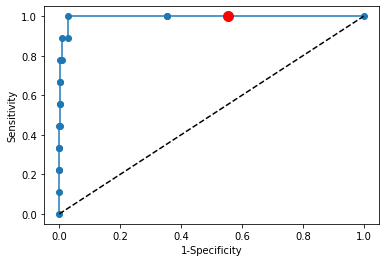

In [28]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([fallout], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [29]:
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.995297


In [30]:
res = [[fpr_i, tpr_i, thres_i] for fpr_i, tpr_i, thres_i in zip(fpr, tpr, thresholds)]

In [31]:
res # 이런 식으로 각 대응되는 값끼리 묶을 수 있습니다.

[[0.0, 0.0, 1.99999996277483],
 [0.0, 0.1111111111111111, 0.9999999627748299],
 [0.0, 0.2222222222222222, 0.9999743030401465],
 [0.0001406271972999578, 0.2222222222222222, 0.9987101056722099],
 [0.0001406271972999578, 0.3333333333333333, 0.961486138324919],
 [0.00042188159189987344, 0.3333333333333333, 0.6377590391882765],
 [0.00042188159189987344, 0.4444444444444444, 0.5480648497676882],
 [0.0007031359864997891, 0.4444444444444444, 0.3677194548486106],
 [0.0007031359864997891, 0.5555555555555556, 0.36116172003101726],
 [0.001546899170299536, 0.5555555555555556, 0.1364743131323381],
 [0.001546899170299536, 0.6666666666666666, 0.13398855807607823],
 [0.002953171143299114, 0.6666666666666666, 0.08674769295102296],
 [0.002953171143299114, 0.7777777777777778, 0.07938603463799468],
 [0.008859513429897343, 0.7777777777777778, 0.03257216838073841],
 [0.008859513429897343, 0.8888888888888888, 0.03222970134151204],
 [0.02770355786809169, 0.8888888888888888, 0.013500255362707096],
 [0.0277035578

### optimal cut-off 찾기

#### 1st

In [32]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.013377036978403109

#### 2nd

In [33]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,fpr,tpr,1-fpr,tf,thresholds
16,0.027704,1.0,0.972296,0.027704,0.013377


#### 3rd

In [34]:
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]
threshold = list(roc_t['thresholds'])
threshold

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


[0.013377036978403109]

세가지 방법 모두 같은 결과

# 새로운 cut-off 적용

In [35]:
y_pred_new = np.where(classifier.predict_proba(X_test)[:,1] > threshold, 1, 0)

In [36]:
confusion_matrix(y_test2, y_pred_new)

array([[6914,  197],
       [   1,    8]], dtype=int64)

In [38]:
precision = 6914 / (6914 + 1)
recall = 6914 / (6914 + 197)
fallout = 1 / (1 + 8)
print("precision_new =", precision)
print("recall_new =", recall)
print("fallout_new =", fallout)

precision_new = 0.9998553868402025
recall_new = 0.9722964421319084
fallout_new = 0.1111111111111111


### default cut-off = 0.5
precision = 0.9992970617179812

recall = 0.9995781184081002

fallout = 0.5555555555555556

### 새로운 cut-off = 0.013377036978403109 적용
precision_new = 0.9998553868402025

recall_new = 0.9722964421319084

fallout_new = 0.1111111111111111

